In [25]:
import os
import tempfile
from pathlib import Path
from zipfile import ZipFile



In [27]:
working_dir = Path(tempfile.gettempdir(), "metric_data")
data_dir = Path(tempfile.gettempdir(), "metric_collection-back")

for a, _, c in os.walk(data_dir):
    for file in c:
        f = Path(a, file)
        d = Path(working_dir, f.name.strip(f.suffix))
        with ZipFile(f, "r") as z:
            z.extractall(path=d)

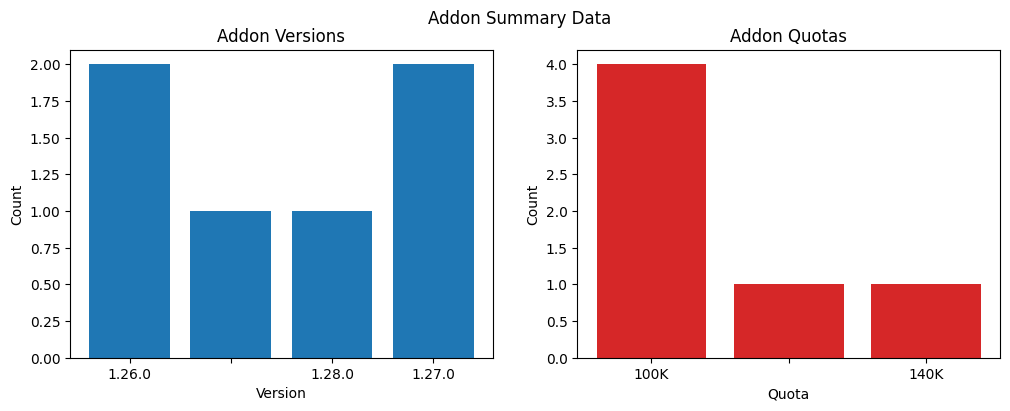

In [59]:
from collections import Counter
import json
import matplotlib.pyplot as plt
# chart versions and quotas
versions = []
quotas = []
for a, b, c in os.walk(working_dir):
    for file in c:
        addon = Path(a, file)
        if addon.name == "addon.json":
            with open(addon, "r") as rf:
                data = json.loads(rf.read())
                versions.append(data['version'])
                quotas.append(data['quota'])

versions = Counter(versions)
quotas = Counter(quotas)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax0.bar(versions.keys(), versions.values())
ax0.set_ylabel("Count")
ax0.set_xlabel("Version")
ax0.set_title("Addon Versions")

ax1.bar(quotas.keys(), quotas.values(), color='tab:red')
ax1.set_ylabel("Count")
ax1.set_xlabel("Quota")
ax1.set_title("Addon Quotas")

fig.suptitle("Addon Summary Data")

plt.show()

# https://www.color-hex.com/color-palette/49436

/tmp/metric_data/7309396f-f2f9-4c6f-984c-2fef3bec4028
/tmp/metric_data/9be10acc-ab3c-4593-aa81-fcd1efc851f9


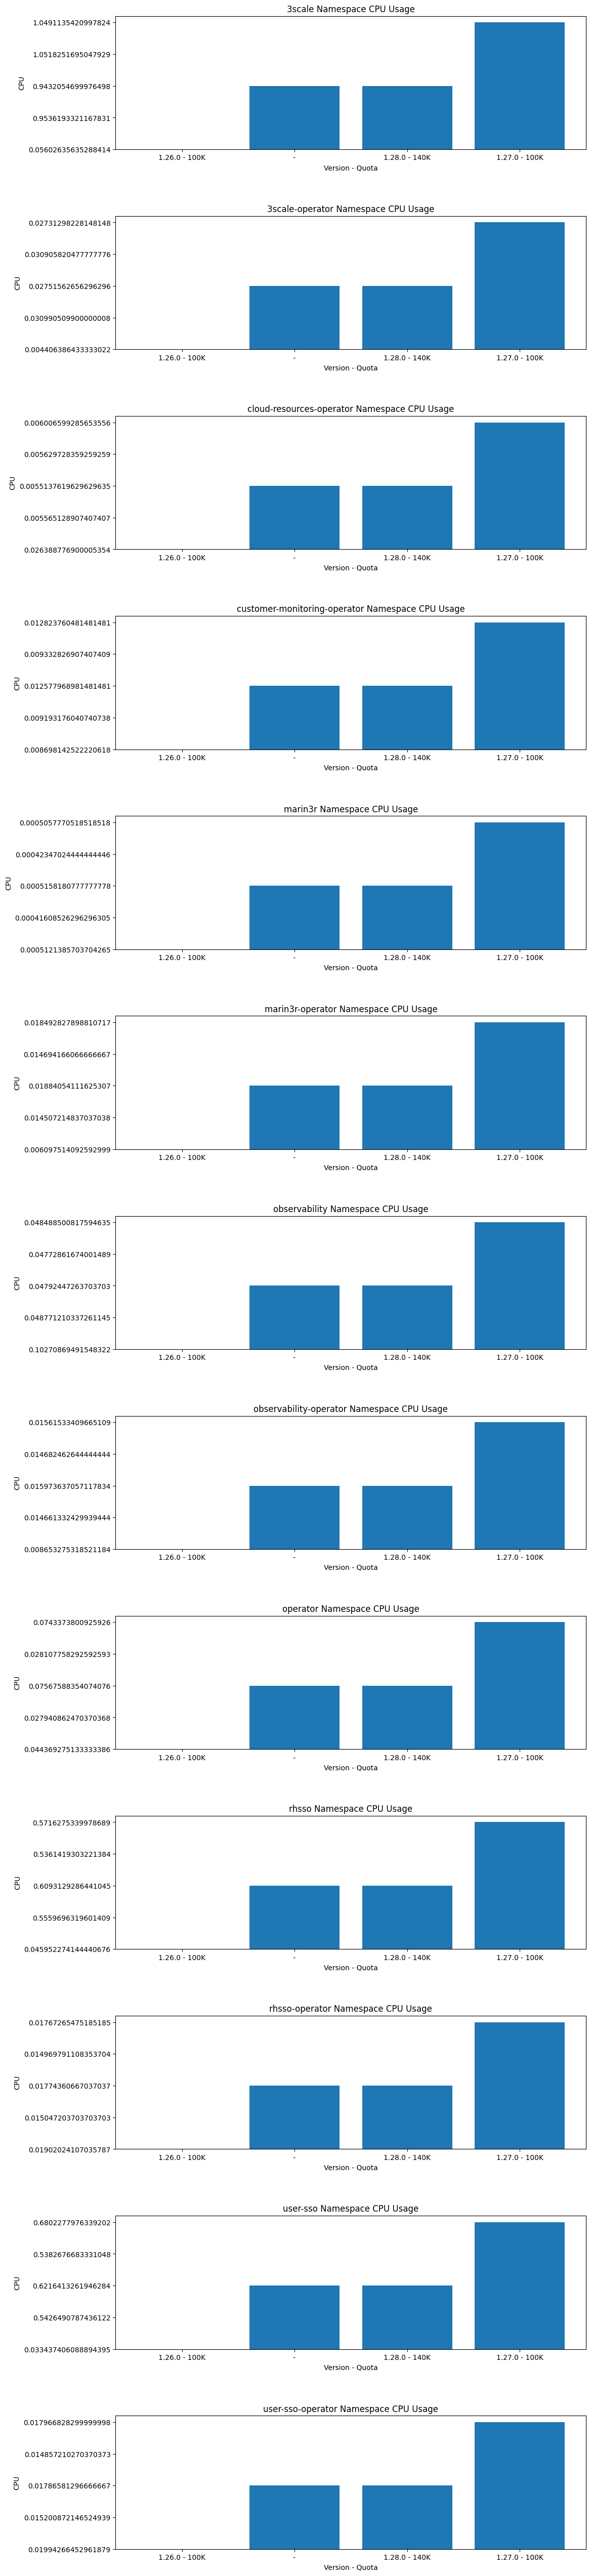

In [105]:
keys = {}
metrics = {}
for a, b, c in os.walk(working_dir):
    for file in c:
        key = ''
        addon = Path(a, file)
        if addon.name == "addon.json":
            with open(addon, "r") as rf:
                data = json.loads(rf.read())
                key = f"{data['version']} - {data['quota']}"
            keys[addon.parent] = key
        if addon.name == "namespace_cpu.json":
            with open(addon, "r") as rf:
                data = json.loads(rf.read())
                metrics[addon.parent] = data['data']['result']

# print(keys)
# print(metrics)
namespaces = {}
for metric in metrics:
    for m in metrics[metric]:

        k = m['metric']['namespace'].split("-")
        k = "-".join(k[2:])

        if k in namespaces:
            namespaces[k].append((keys[metric], m['value'][1]))
            pass
        else:
            namespaces.setdefault(k, [(keys[metric], m['value'][1]),])

# print(namespaces)

pnum = len(namespaces)
keys = list(namespaces.keys())

fig, ax_arr = plt.subplots(pnum, figsize=(12, 5*pnum) )
i = 0
for ax in ax_arr.flatten():
    x, y = zip(*namespaces[keys[i]])
    ax.bar(x, y)
    ax.set_ylabel("CPU")
    ax.set_xlabel("Version - Quota")
    ax.set_title(f"{keys[i]} Namespace CPU Usage")
    ax.set_ylim(bottom=0)
    i += 1

plt.subplots_adjust(hspace=0.5)
plt.show()

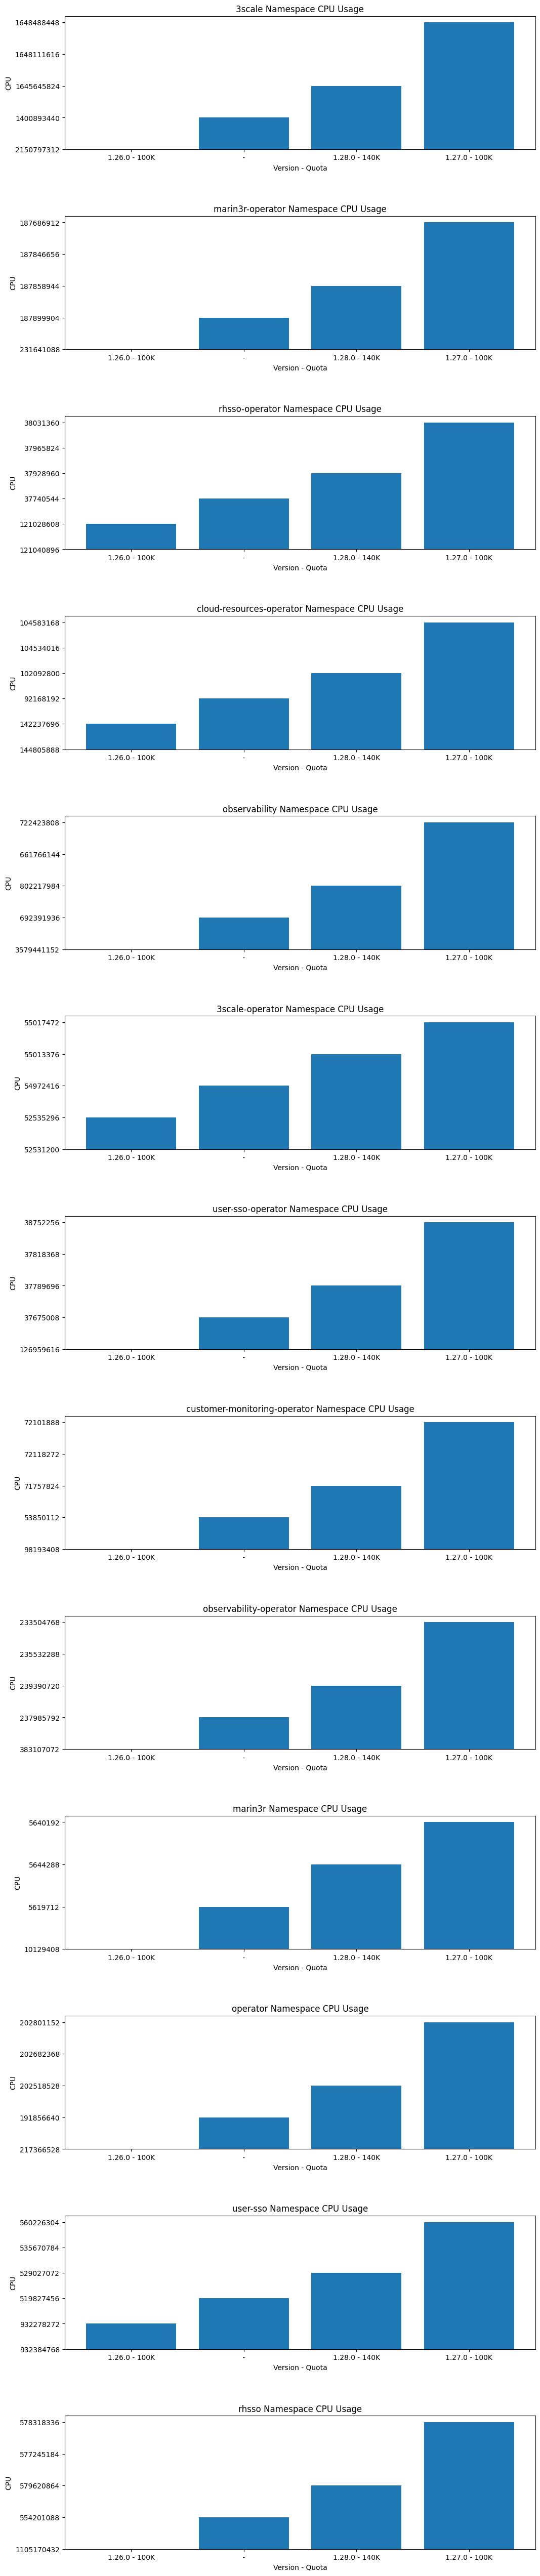

In [106]:
keys = {}
metrics = {}
for a, b, c in os.walk(working_dir):
    for file in c:
        key = ''
        addon = Path(a, file)
        if addon.name == "addon.json":
            with open(addon, "r") as rf:
                data = json.loads(rf.read())
                key = f"{data['version']} - {data['quota']}"
            keys[addon.parent] = key
        if addon.name == "namespace_memory.json":
            with open(addon, "r") as rf:
                data = json.loads(rf.read())
                metrics[addon.parent] = data['data']['result']

# print(keys)
# print(metrics)
namespaces = {}
for metric in metrics:
    for m in metrics[metric]:

        k = m['metric']['namespace'].split("-")
        k = "-".join(k[2:])

        if k in namespaces:
            namespaces[k].append((keys[metric], m['value'][1]))
            pass
        else:
            namespaces.setdefault(k, [(keys[metric], m['value'][1]),])

# print(namespaces)

pnum = len(namespaces)
keys = list(namespaces.keys())

fig, ax_arr = plt.subplots(pnum, figsize=(12, 5*pnum) )
i = 0
for ax in ax_arr.flatten():
    x, y = zip(*namespaces[keys[i]])
    ax.bar(x, y)
    ax.set_ylabel("Memory")
    ax.set_xlabel("Version - Quota")
    ax.set_title(f"{keys[i]} Namespace Memory Usage")
    ax.set_ylim(bottom=0)
    i += 1

plt.subplots_adjust(hspace=0.5)
plt.show()

{'metric': {}, 'value': [1664814723.543, '3581444096']}
{'metric': {}, 'value': [1664814734.83, '3581444096']}
{'metric': {}, 'value': [1664812287.064, '1400893440']}
{'metric': {}, 'value': [1664813225.102, '1645645824']}
{'metric': {}, 'value': [1664813416.829, '1648111616']}
{'metric': {}, 'value': [1664813615.526, '1648488448']}


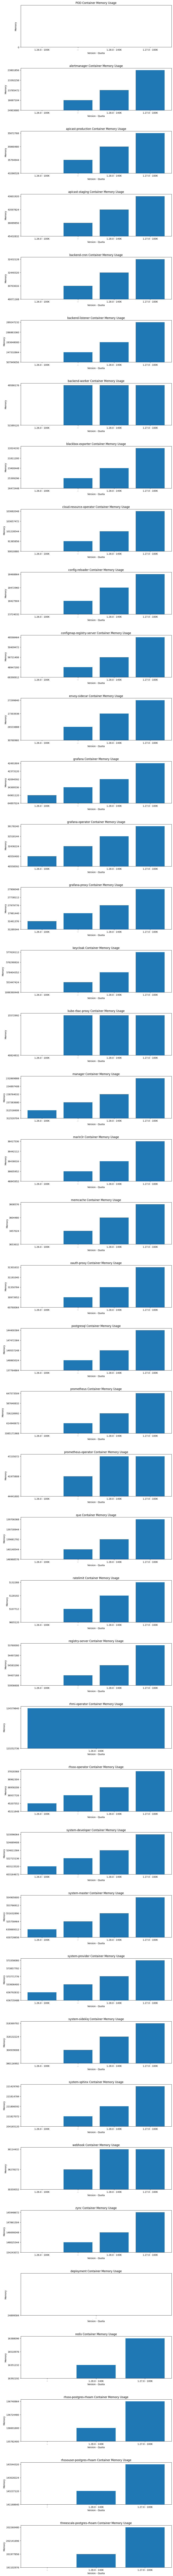

In [123]:
keys = {}
metrics = {}
for a, b, c in os.walk(working_dir):
    for file in c:
        key = ''
        addon = Path(a, file)
        if addon.name == "addon.json":
            with open(addon, "r") as rf:
                data = json.loads(rf.read())
                key = f"{data['version']} - {data['quota']}"
            keys[addon.parent] = key
        if addon.name == "container_memory.json":
            with open(addon, "r") as rf:
                data = json.loads(rf.read())
                metrics[addon.parent] = data['data']['result']

# print(keys)
# print(metrics)
containers = {}
for metric in metrics:
    for m in metrics[metric]:
        try:
            if m['metric']['container'] in containers:
                containers[m['metric']['container']].append((keys[metric], m['value'][1]))
                pass
            else:
                containers.setdefault(m['metric']['container'], [(keys[metric], m['value'][1]),])
        except KeyError:
            print(m)
# print(namespaces)

pnum = len(containers)
keys = list(containers.keys())

fig, ax_arr = plt.subplots(pnum, figsize=(12, 5*pnum) )
i = 0
for ax in ax_arr.flatten():
    x, y = zip(*containers[keys[i]])
    ax.bar(x, y)
    ax.set_ylabel("Memory")
    ax.set_xlabel("Version - Quota")
    ax.set_title(f"{keys[i]} Container Memory Usage")
    ax.set_ylim(bottom=0)
    i += 1

plt.subplots_adjust(hspace=0.5)
plt.show()